<a href="https://colab.research.google.com/github/yurim22/DeepLearning/blob/master/facial_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [96]:
import h5py

train_dataset = h5py.File('sample_data/train_happy.h5')
train_x = np.array(train_dataset['train_set_x'][:])
train_y = np.array(train_dataset['train_set_y'][:])

test_dataset = h5py.File('sample_data/test_happy.h5')
test_x = np.array(test_dataset['test_set_x'][:])
test_y = np.array(test_dataset['test_set_y'][:])


# y reshaped
train_y = train_y.reshape((train_x.shape[0],1))
test_y = test_y.reshape((test_y.shape[0],1))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  import sys


In [97]:
print(train_x.shape, test_x.shape)
print(train_y.shape, test_y.shape)

(600, 64, 64, 3) (150, 64, 64, 3)
(600, 1) (150, 1)


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


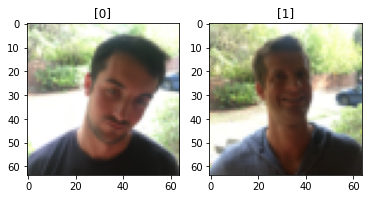

In [98]:
plt.subplot(1, 2, 1)
plt.title(train_y[0])
plt.imshow(train_x[0])
# plt.subplot(1, 2, 2)
# plt.title(test_y[1])
# plt.imshow(test_x[1])
plt.subplot(1, 2, 2)
plt.title(train_y[1])
plt.imshow(train_x[1])


In [99]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        samplewise_center=True,
        samplewise_std_normalization=True,
        brightness_range=[0.5, 1.5],
        horizontal_flip=True)
test_datagen = ImageDataGenerator(
    rescale=1./255,
    samplewise_center=True,
    samplewise_std_normalization=True)

batch_size = 30
train_batch_gen = train_datagen.flow(train_x, train_y, batch_size, shuffle=True)
test_batch_gen = test_datagen.flow(test_x, test_y, batch_size, shuffle=False)

In [100]:

epochs = 20
IMG_HEIGHT = 64
IMG_WIDTH = 64

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 4096)            

In [104]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [101]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 4096)            

In [105]:
history = model.fit_generator(
    train_batch_gen,
    steps_per_epoch=600//batch_size,
    epochs=epochs,
    validation_data=test_batch_gen,
    validation_steps=150 // batch_size
)

Epoch 1/20
20/20 [==============================] - 3s 170ms/step - loss: 0.7140 - accuracy: 0.5050 - val_loss: 0.6593 - val_accuracy: 0.4400
Epoch 2/20
20/20 [==============================] - 3s 168ms/step - loss: 0.6118 - accuracy: 0.6200 - val_loss: 0.5729 - val_accuracy: 0.6200
Epoch 3/20
20/20 [==============================] - 3s 165ms/step - loss: 0.5763 - accuracy: 0.6900 - val_loss: 0.5037 - val_accuracy: 0.6933
Epoch 4/20
20/20 [==============================] - 3s 169ms/step - loss: 0.5192 - accuracy: 0.7150 - val_loss: 0.4457 - val_accuracy: 0.6867
Epoch 5/20
20/20 [==============================] - 4s 178ms/step - loss: 0.4398 - accuracy: 0.7833 - val_loss: 0.3732 - val_accuracy: 0.7733
Epoch 6/20
20/20 [==============================] - 3s 168ms/step - loss: 0.3819 - accuracy: 0.8083 - val_loss: 0.3335 - val_accuracy: 0.8000
Epoch 7/20
20/20 [==============================] - 3s 168ms/step - loss: 0.3839 - accuracy: 0.8283 - val_loss: 0.3245 - val_accuracy: 0.7933
Epoch 

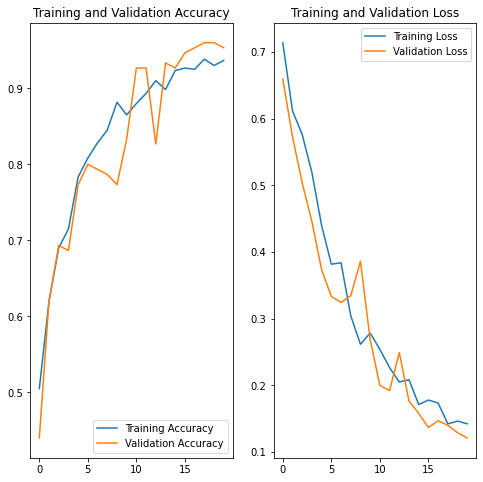

In [106]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [57]:
print(val_acc)
print(val_loss)

[0.42500001192092896, 0.5874999761581421, 0.675000011920929, 0.7124999761581421, 0.675000011920929, 0.7250000238418579, 0.737500011920929, 0.7250000238418579, 0.762499988079071, 0.737500011920929, 0.875, 0.8500000238418579, 0.800000011920929, 0.9125000238418579, 0.8500000238418579, 0.925000011920929, 0.8125, 0.9375, 0.887499988079071, 0.9624999761581421]
[0.6837558746337891, 0.6286587715148926, 0.5732495188713074, 0.6497074365615845, 0.5356563329696655, 0.5048071146011353, 0.41472092270851135, 0.4008333683013916, 0.36745843291282654, 0.4649743139743805, 0.2496069222688675, 0.3266860544681549, 0.28057798743247986, 0.22383904457092285, 0.27711161971092224, 0.198440283536911, 0.32579097151756287, 0.17951078712940216, 0.24463434517383575, 0.20031563937664032]
